In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [3]:
import pandas as pd
train = pd.read_csv("C:/Users/HP/Desktop/MachineHack/TrainData.csv")
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
train.shape

(13320, 9)

In [5]:
train.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
pd.isnull(train).sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

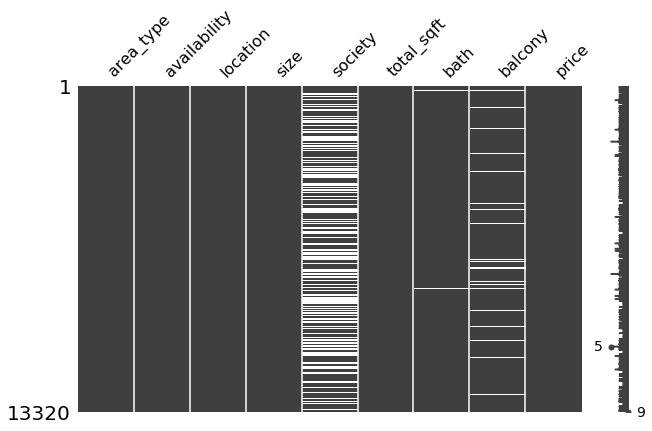

In [7]:
#make a matrix of the missing value column
mn.matrix(train, figsize=(10,6))

In [8]:
def convert(a):
    data=str(a['total_sqft'])
    if '-' in data:
        ans=(float(data.split('-')[0].strip())+float(data.split('-')[1].strip()))/2 #printing the data
        #print(ans)
        return ans
        #print(x[5]) 
    elif 'Sq. M' in data:
        ans=float(data[:data.find('Sq. M')])*10.7639
        return ans
    elif 'Sq. Y' in data:
        ans=float(data[:data.find('Sq. Y')])*9
        return ans
    elif 'Perch' in data:
        ans=float(data[:data.find('Perch')])*272.25
        return ans
    elif 'Acres' in data:
        ans=float(data[:data.find('Acres')])*43560
        return ans
    elif 'Cents' in data:
        ans=float(data[:data.find('Cents')])*435.61
        return ans
    elif 'Guntha' in data:
        ans=float(data[:data.find('Guntha')])*1089
        return ans
    elif 'Grounds' in data:
        ans=float(data[:data.find('Grounds')])*2400
        return ans
    else:
        return float(data)
train['total_sqft']= train.apply(convert,axis=1)

In [9]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [10]:
train.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [11]:
train['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [12]:
len(train['location'].unique())

1306

In [13]:
#!pip install pygeocoder

In [14]:
from pygeocoder import Geocoder
df = pd.DataFrame(train['location'])
df.head()

,location
0,Electronic City Phase II
1,Chikka Tirupathi
2,Uttarahalli
3,Lingadheeranahalli
4,Kothanur


In [15]:
#!pip install geopy

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [17]:
def geolocate(city=train['location'], country=None):

#Inputs city and country, or just country. Returns the lat/long coordinates of 
#either the city if possible, if not, then returns lat/long of the center of the country.

    
    # If the city exists,
    if city != None:
        # Try
        try:
            # To geolocate the city and country
            loc = geolocator.geocode(city)
            # And return latitude and longitude
            return (loc.latitude, loc.longitude)
        # Otherwise
        except:
            # Return missing value
            return np.nan
    # If the city doesn't exist
    #else:
        # Try
     #   try:
            # Geolocate the center of the country
      #      loc = geolocator.geocode(country)
            # And return latitude and longitude 
       #     return (loc.latitude, loc.longitude)
        # Otherwise
        #except:
            # Return missing value
         #   return np.nan

In [18]:
# Geolocate a city and country
geolocate(city='location')

(39.2138905, -79.6371124)

In [19]:
copy_dataset = train
copy_dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [12]:
print(len(train[train['location']=='Whitefield']))
print(len(train[train['location']=='Electronic City Phase II']))
print(len(train[train['location']=='Chikka Tirupathi']))
print(len(train[train['location']=='Uttarahalli']))
#print(len(train[train['location']=='12th cross srinivas nagar banshankari 3rd stage']))
#print(len(train[train['location']=='Abshot Layout']))
#print(len(train[train['location']=='Havanur extension']))
print(len(train[train['location']=='BTM Layout']))
print(len(train[train['location']=='Marathahalli']))
print(len(train[train['location']=='Koramangala']))
print(len(train[train['location']=='Hebbal']))
print(len(train[train['location']=='Ulsoor']))
print(len(train[train['location']=='Indira Nagar']))

540
132
17
186
17
175
72
177
21
44


In [13]:
len(train[train['location']=='Anantapura'])

3

In [14]:
#location has one missing value, so checking the where it is null.
train[train['location'].isnull()]
train[train['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600.0,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600.0,3.0,2.0,77.0


In [15]:
train['location'].fillna('Anantapura',inplace=True)

In [16]:
train[train['location'].isnull()]
train[train['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,Anantapura,3 BHK,Grare S,1600.0,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600.0,3.0,2.0,77.0


In [17]:
train[train['location'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [18]:
pd.isnull(train).sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [19]:
imputable_train = train.iloc[:,5:]

In [20]:
imputable_train.shape

(13320, 4)

In [21]:
imputable_train.head()
imputable_train.isnull().sum()

total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [22]:
import fancyimpute

In [23]:
mice_imputation=fancyimpute.MICE(verbose= False)

In [24]:
imputable_train = mice_imputation.complete(imputable_train)

In [25]:
imputable_train = pd.DataFrame(imputable_train)
imputable_train.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [26]:
train.drop(['total_sqft','bath','balcony','price'],inplace=True,axis=1)

In [27]:
imputable_train.columns=['total_sqft','bath','balcony','price']
train = pd.concat([train, imputable_train], axis=1, join='inner')

In [28]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [29]:
train.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [30]:
train['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom', '7 Bedroom',
       '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK', '9 BHK', nan,
       '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom', '10 BHK',
       '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK', '12 Bedroom',
       '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
train.shape

(13320, 9)

In [32]:
train[train['size'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1800.0,2.742377,1.481523,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,3817.0,2.636385,1.658392,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400.0,2.698449,1.708064,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1800.0,2.678711,1.537717,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1950.0,2.651465,1.608779,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,3752.5,2.846840,1.602054,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324.0,2.337735,1.503288,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500.0,2.601082,1.552335,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,1730.0,2.610246,1.496548,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000.0,2.918654,1.527868,400.000


In [33]:
train[train['availability']=='Immediate Possession']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1800.0,2.742377,1.481523,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,3817.0,2.636385,1.658392,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400.0,2.698449,1.708064,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1800.0,2.678711,1.537717,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1950.0,2.651465,1.608779,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,3752.5,2.846840,1.602054,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324.0,2.337735,1.503288,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500.0,2.601082,1.552335,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,1730.0,2.610246,1.496548,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000.0,2.918654,1.527868,400.000


In [34]:
# Size is a categorical variable and has to be converted into numerical for further consideration.
# For BHK, multiply by 4*B+3+2
#For Bedroom, 4*B+3
#For RK, 2+3 = 5
def convertsize(x):
    if 'Bedroom' in str(x):
        x=x.split(' ')
        return int(x[0])*4+3
    elif 'BHK' in str(x):
        x=x.split(' ')
        return int(x[0])*4+3+2
    elif 'RK' in str(x):
        return 5
    else:
        return x
train['size']=train['size'].apply(convertsize)   

In [35]:
train.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,13.0,Coomee,1056.0,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,19.0,Theanmp,2600.0,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,17.0,NaN,1440.0,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,17.0,Soiewre,1521.0,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,13.0,NaN,1200.0,2.0,1.000000,51.00
5,Super built-up Area,Ready To Move,Whitefield,13.0,DuenaTa,1170.0,2.0,1.000000,38.00
6,Super built-up Area,18-May,Old Airport Road,21.0,Jaades,2732.0,4.0,1.736011,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,21.0,Brway G,3300.0,4.0,1.520462,600.00
8,Super built-up Area,Ready To Move,Marathahalli,17.0,NaN,1310.0,3.0,1.000000,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,27.0,NaN,1020.0,6.0,1.569216,370.00


In [36]:
train['size'].isnull().sum()

16

In [37]:
import fancyimpute
size_imputation = fancyimpute.MICE(verbose= False)

In [38]:
size = train.iloc[:,3:]

In [39]:
size.drop('society',inplace=True,axis=1)
size.head()

,size,total_sqft,bath,balcony,price
0,13.0,1056.0,2.0,1.0,39.07
1,19.0,2600.0,5.0,3.0,120.00
2,17.0,1440.0,2.0,3.0,62.00
3,17.0,1521.0,3.0,1.0,95.00
4,13.0,1200.0,2.0,1.0,51.00


In [40]:
size = size_imputation.complete(size)

In [41]:
train.drop('size',inplace=True,axis=1)

In [42]:
size = pd.DataFrame(size)
size.head()
train=pd.concat([train,size.iloc[:,0]],axis=1)

In [43]:
train = train.rename(columns={0:'size'})

In [44]:
train.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,size
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,13.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,19.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,17.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,17.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,13.0


In [45]:
train[train['availability']=='Immediate Possession']

,area_type,availability,location,society,total_sqft,bath,balcony,price,size
579,Plot Area,Immediate Possession,Sarjapur Road,Asiss B,1800.0,2.742377,1.481523,34.185,15.684581
1775,Plot Area,Immediate Possession,IVC Road,Orana N,3817.0,2.636385,1.658392,124.000,15.628244
2264,Plot Area,Immediate Possession,Banashankari,NaN,2400.0,2.698449,1.708064,460.000,15.960747
2809,Plot Area,Immediate Possession,Sarjapur Road,AsdiaAr,1800.0,2.678711,1.537717,28.785,15.789642
2862,Plot Area,Immediate Possession,Devanahalli,Ajleyor,1950.0,2.651465,1.608779,46.800,16.203819
5333,Plot Area,Immediate Possession,Devanahalli,Emngs S,3752.5,2.846840,1.602054,177.115,15.323181
6423,Plot Area,Immediate Possession,Whitefield,SRniaGa,2324.0,2.337735,1.503288,26.730,15.798193
6636,Plot Area,Immediate Possession,Jigani,S2enste,1500.0,2.601082,1.552335,25.490,16.852027
6719,Plot Area,Immediate Possession,Hoskote,SJowsn,1730.0,2.610246,1.496548,28.545,16.195232
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,5000.0,2.918654,1.527868,400.000,16.360048


In [46]:
train['size']=train['size'].apply(lambda k:round(k))
train['bath']=train['bath'].apply(lambda k:round(k))

In [47]:
train['total_sqft']=train['total_sqft'].apply(lambda k:round(k))
train['balcony']=train['balcony'].apply(lambda k:round(k))

In [48]:
train[train['availability']=='Immediate Possession']

,area_type,availability,location,society,total_sqft,bath,balcony,price,size
579,Plot Area,Immediate Possession,Sarjapur Road,Asiss B,1800,3,1,34.185,16
1775,Plot Area,Immediate Possession,IVC Road,Orana N,3817,3,2,124.000,16
2264,Plot Area,Immediate Possession,Banashankari,NaN,2400,3,2,460.000,16
2809,Plot Area,Immediate Possession,Sarjapur Road,AsdiaAr,1800,3,2,28.785,16
2862,Plot Area,Immediate Possession,Devanahalli,Ajleyor,1950,3,2,46.800,16
5333,Plot Area,Immediate Possession,Devanahalli,Emngs S,3752,3,2,177.115,15
6423,Plot Area,Immediate Possession,Whitefield,SRniaGa,2324,2,2,26.730,16
6636,Plot Area,Immediate Possession,Jigani,S2enste,1500,3,2,25.490,17
6719,Plot Area,Immediate Possession,Hoskote,SJowsn,1730,3,1,28.545,16
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,5000,3,2,400.000,16


In [49]:
train.isnull().sum()

area_type          0
availability       0
location           0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
size               0
dtype: int64

In [50]:
build = train.drop(['availability','location','society'], axis = 1)

In [51]:
build.head()

,area_type,total_sqft,bath,balcony,price,size
0,Super built-up Area,1056,2,1,39.07,13
1,Plot Area,2600,5,3,120.00,19
2,Built-up Area,1440,2,3,62.00,17
3,Super built-up Area,1521,3,1,95.00,17
4,Super built-up Area,1200,2,1,51.00,13


In [52]:
build.dtypes

area_type      object
total_sqft      int64
bath            int64
balcony         int64
price         float64
size            int64
dtype: object

In [53]:
build = pd.get_dummies(build)

In [54]:
build.head(10)

,total_sqft,bath,balcony,price,size,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1056,2,1,39.07,13,0,0,0,1
1,2600,5,3,120.00,19,0,0,1,0
2,1440,2,3,62.00,17,1,0,0,0
3,1521,3,1,95.00,17,0,0,0,1
4,1200,2,1,51.00,13,0,0,0,1
5,1170,2,1,38.00,13,0,0,0,1
6,2732,4,2,204.00,21,0,0,0,1
7,3300,4,2,600.00,21,0,0,0,1
8,1310,3,1,63.25,17,0,0,0,1
9,1020,6,2,370.00,27,0,0,1,0


In [55]:
build_labels = build.iloc[:,3]
build_labels.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [56]:
build = build.drop('price',axis=1)
build.head()

,total_sqft,bath,balcony,size,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1056,2,1,13,0,0,0,1
1,2600,5,3,19,0,0,1,0
2,1440,2,3,17,1,0,0,0
3,1521,3,1,17,0,0,0,1
4,1200,2,1,13,0,0,0,1


In [1]:
from sklearn import linear_model

In [58]:
regress = linear_model.LinearRegression()
regress.fit(build, np.log(build_labels))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y_predict = regress.predict(build)

In [60]:
y_predict

array([ 4.08409713,  5.46375984,  4.30372098, ...,  4.11295055,
        4.65911323,  3.79743791])

In [61]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(np.log(build_labels),(y_predict)))

0.5573075972455188

# TESTING DATA

In [62]:
test = pd.read_csv('C:/Users/HP/MachineHack/TestData.csv')

In [63]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [64]:
test.drop(['location','availability','society','price'],inplace=True,axis=1)

In [65]:
test.head()

,area_type,size,total_sqft,bath,balcony
0,Super built-up Area,2 BHK,1225,2.0,2.0
1,Plot Area,9 Bedroom,2400,9.0,2.0
2,Plot Area,4 Bedroom,1650,5.0,2.0
3,Super built-up Area,3 BHK,1322,3.0,1.0
4,Super built-up Area,2 BHK,1161,2.0,1.0


In [66]:
test.isnull().sum()

area_type      0
size           2
total_sqft     0
bath           7
balcony       69
dtype: int64

In [67]:
test['total_sqft'] = test.apply(convert,axis=1)

In [68]:
test['size']= test['size'].apply(convertsize)

In [69]:
test.head()

,area_type,size,total_sqft,bath,balcony
0,Super built-up Area,13.0,1225.0,2.0,2.0
1,Plot Area,39.0,2400.0,9.0,2.0
2,Plot Area,19.0,1650.0,5.0,2.0
3,Super built-up Area,17.0,1322.0,3.0,1.0
4,Super built-up Area,13.0,1161.0,2.0,1.0


In [70]:
imp_test = fancyimpute.MICE(verbose= False)

In [71]:
df = imp_test.complete(test.iloc[:,1:])

In [72]:
df = pd.DataFrame(df)

In [73]:
df.head(10)

,0,1,2,3
0,13.0,1225.0,2.0,2.000000
1,39.0,2400.0,9.0,2.000000
2,19.0,1650.0,5.0,2.000000
3,17.0,1322.0,3.0,1.000000
4,13.0,1161.0,2.0,1.000000
5,19.0,760.0,3.0,1.000000
6,19.0,4500.0,4.0,1.000000
7,13.0,960.0,2.0,0.000000
8,17.0,1569.0,3.0,1.000000
9,17.0,2400.0,4.0,1.422854


In [74]:
pd.isnull(df).sum()

0    0
1    0
2    0
3    0
dtype: int64

In [75]:
df.columns = ['size','total_sqft','bath','balcony']

In [76]:
df = df.reindex_axis(['total_sqft','bath','balcony','size'],axis=1)
df.head(10)

,total_sqft,bath,balcony,size
0,1225.0,2.0,2.000000,13.0
1,2400.0,9.0,2.000000,39.0
2,1650.0,5.0,2.000000,19.0
3,1322.0,3.0,1.000000,17.0
4,1161.0,2.0,1.000000,13.0
5,760.0,3.0,1.000000,19.0
6,4500.0,4.0,1.000000,19.0
7,960.0,2.0,0.000000,13.0
8,1569.0,3.0,1.000000,17.0
9,2400.0,4.0,1.422854,17.0


In [77]:
test.drop(['size','total_sqft','bath','balcony'],axis=1,inplace=True)

In [78]:
test = pd.concat([test,df],axis = 1)

In [79]:
test.head()

,area_type,total_sqft,bath,balcony,size
0,Super built-up Area,1225.0,2.0,2.0,13.0
1,Plot Area,2400.0,9.0,2.0,39.0
2,Plot Area,1650.0,5.0,2.0,19.0
3,Super built-up Area,1322.0,3.0,1.0,17.0
4,Super built-up Area,1161.0,2.0,1.0,13.0


In [80]:
test.isnull().sum()

area_type     0
total_sqft    0
bath          0
balcony       0
size          0
dtype: int64

In [81]:
test = pd.get_dummies(test)

In [82]:
test['bath']=test['bath'].apply(lambda k:round(k))
test['total_sqft']=test['total_sqft'].apply(lambda k:round(k))
test['balcony']=test['balcony'].apply(lambda k:round(k))
test['size']=test['size'].apply(lambda k:round(k))
test.head()

,total_sqft,bath,balcony,size,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1225,2,2,13,0,0,0,1
1,2400,9,2,39,0,0,1,0
2,1650,5,2,19,0,0,1,0
3,1322,3,1,17,0,0,0,1
4,1161,2,1,13,0,0,0,1


In [83]:
answer_prediction = regress.predict(test)

In [84]:
test.shape

(1480, 8)

In [85]:
answer_prediction

array([ 4.18151189,  6.50761701,  5.3658392 , ...,  4.18150606,
        4.11285663,  4.21026168])

In [86]:
final_predicted_price = pd.read_csv('C:/Users/HP/MachineHack/TestData.csv')

In [87]:
final_predicted_price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [88]:
final_predicted_price.drop('price',inplace=True,axis=1)

In [89]:
answer_df = pd.DataFrame(answer_prediction)

In [90]:
answer_df.columns=['price']
answer_df.head(10)

,price
0,4.181512
1,6.507617
2,5.365839
3,4.370601
4,4.084165
5,4.687227
6,4.689806
7,4.015528
8,4.370761
9,4.690463


In [91]:
final_predicted_price = pd.concat([final_predicted_price,answer_df],axis=1)

In [92]:
final_predicted_price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,4.181512
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,6.507617
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,5.365839
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,4.370601
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,4.084165


In [93]:
final_predicted_price['price'] = final_predicted_price['price'].apply(lambda x:round(x,2))

In [94]:
final_predicted_price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,4.18
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,6.51
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,5.37
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,4.37
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,4.08


In [95]:
Excel = pd.ExcelWriter('final_predicted_price_lin.xlsx')
final_predicted_price.to_excel(Excel,'Answer')
Excel.save()

In [96]:
final_predicted_price['price'].mean()

4.415777027027022

In [97]:
final_predicted_price.shape

(1480, 9)